**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Jiaqi Wu
- Ella Wen
- Zihao Yang
- Yunqi Zhang
- Zhining Zhang

# Research Question

#### How do factors such as course difficulty, instructor quality, and course level (lower vs. upper division) correlate with student satisfaction scores in UCSD STEM courses, based on CAPE data from the 2020-2022 academic year?

The factors that may influence the likelihood of students recommending a class include:

- Instructor Quality: Indicated by the percentage of students recommending the instructor.

- Course Difficulty: Implied by the average number of hours spent studying per week.

- Grade Expectations vs. Actual Grades: Measured by the difference between expected and received GPA.

- Number of Evaluations: A higher number provides a more reliable recommendation rate.

- Enrollment Size: Larger class sizes may impact instruction quality and student engagement.

- Term and Course Context: Course content, teaching methods, and term-specific factors may influence recommendations.

## Background and Prior Work


When students at UCSD register for courses on WebReg each quarter, we often rely on Course and Professor Evaluations (CAPEs) to make our decisions. This online evaluation provides us insight on various aspects of a course, such as instructor, workload, and expected vs. received grades. One of the key categories within CAPE is the recommendation rate of the class, which is the percentage of students who would recommend a course to others. However, it remains unclear which factors have the most significant impact on a student’s likelihood of recommending a course.

For this project, we aim to analyze the correlation between CAPE recommendation rates and other CAPEs factors, such as instructor ratings, expected vs. received grades, study hours per week, and overall course enrollment. This can help us better select the courses.

In this past project shown in Reference #1, a group of UCSD students in COGS108 conducted research on past CAPE data, focusing on identifying the key factors that influence the average GPA of a class at UCSD. Their study explored correlations between expected and actual GPAs, study time, class/professor evaluations, and GPA trends across different fields and course levels. One of their notable findings was that upper-division classes tend to have higher average GPAs than lower-division classes, challenging common assumptions about course difficulty.

While their project primarily aimed to understand GPA predictors and their implications for university policies, our research takes a different approach by focusing on the factors that influence students' likelihood of recommending a class in CAPEs. Instead of analyzing the average GPA received by students, we examine the recommendation rate of a class to understand what aspects contribute to a positive course evaluation. However, like their study, our research also relies on CAPE survey data, making their findings a relevant reference for understanding broader academic trends at UCSD.

Prior studies in Reference #2 have explored various aspects of student course selection. Dahl et al. (2022) examined how student attitudes towards the class, class recommendation rate, and perceived behavioral control impact their decision to enroll in a course. This provides a similar approach to our question, what factors influenced the class recommendation rate. It aligns with our hypothesis that instructor quality, expected workload, and grading play a major role in student's satisfication. 



References (include links):
- 1) https://github.com/COGS108/FinalProjects-Sp23/blob/main/FinalProjectGroup_Sp23_DigitSapiens.ipynb
- 2) https://nactajournal.org/index.php/nactaj/article/view/138
- 3) https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData.git/ 

# Hypothesis



Instructor recommendation ratings, course difficulty, grade expectations, and enrollment size are significant predictors of class recommendation rates in UCSD STEM courses.
Specifically:

Courses with higher instructor recommendation ratings will have higher class recommendation rates.

Courses with lower perceived difficulty (fewer study hours per week) will have higher class recommendation rates.

Courses where students’ actual grades meet or exceed their expectations will have higher class recommendation rates.

Smaller enrollment sizes will correlate with higher class recommendation rates compared to larger enrollment sizes.


# Data

## Dataset CAPE Student Course Evaluations

- **Dataset Name:** CAPE Student Course Evaluations
- **Link to the dataset:** *https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData/blob/master/data/CAPEs.tsv*
- **Number of observations:** **61,791**
- **Each observation is described by 11 variables, including:**
  - instructor (String) – The name of the instructor for the course.
  - sub_course (String) – The course code (e.g., CSE 101, MATH 20A).
  - course (String) – The name of the course (e.g., "Data Structures", "Calculus I").
  - term (String) – The academic term during which the course was offered (e.g., "Fall 2021").
  - enroll (Integer) – The total number of students enrolled in the class.
  - evals_made (Integer) – The number of students who submitted evaluations for the course.
  - rcmd_class (Float, 0.0 - 100.0) – The percentage of students who recommend the class.
  - rcmd_instr (Float, 0.0 - 100.0) – The percentage of students who recommend the instructor.
  - study_hr_wk (Float) – The average number of hours students reported studying for the course per week.
  - avg_grade_exp (Float, 0.0 - 4.0) – The average GPA that students expected to receive in the class.
  - avg_grade_rec (String) – The average letter grade that students reported expecting (e.g., "A", "B+").

The **CAPE dataset** contains student evaluations of university courses until **2023**, capturing key insights into instructor effectiveness, course difficulty, and student workload. Each row represents a specific course-section taught by an instructor in a given term (e.g., FA22 for Fall 2022) and includes metrics such as enrollment numbers, evaluation counts, and recommendation percentages for both the course and instructor. Additionally, it records students' reported study hours per week and their expected vs. received GPA. Missing values in the **`avg_grade_rec`** column, originally represented as `-1`, have been removed to ensure data accuracy. With proper analysis, this dataset can be used to study student's staisfactory scores towards different courses over time.

In [41]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

import patsy
import statsmodels.api as sm
from scipy import stats

# Load our data
file_path = "data/CAPEs.tsv"
df = pd.read_csv(file_path, sep="\t")

In [49]:
# Our research question only focus between 2020 - 2022 academic years
time_frame = ['20', '21', '22']
df = df[df['term'].str[-2:].isin(time_frame)]

# Data Cleaning
df_cleaned = df[df['avg_grade_rec'] != -1]
df_cleaned = df_cleaned.dropna()

# Display the cleaned dataframe
df_cleaned

,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec
33,"Fortier, Jana",ANAR 100,Spec Topics/Anth Archaeology,FA22,20,3,100.0,100.0,3.17,3.33,3.30
36,"Goldstein, Paul S",ANAR 143,Biblical Arch,FA22,25,8,100.0,100.0,1.36,3.86,3.85
37,"Marchetto, Maria Carolina",ANBI 100,Special Topic/Biological Anth,FA22,30,14,100.0,100.0,1.93,4.00,3.99
41,"Gagneux, Pascal",ANBI 141,The Evolution of Human Diet,FA22,186,69,98.5,100.0,3.76,3.70,3.66
42,"Hrvoj Mihic, Branka",ANBI 145,Bioarchaeology,FA22,20,4,75.0,100.0,4.50,3.33,2.84
...,...,...,...,...,...,...,...,...,...,...,...
61786,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,WI22,404,243,90.9,93.4,3.95,3.94,3.90
61787,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,WI22,191,93,77.0,88.5,4.18,3.79,3.89
61788,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,FA21,319,135,68.0,74.4,3.89,3.93,3.88
61789,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,SP21,235,107,90.6,95.3,5.15,3.85,3.88


In [50]:
# We defined a list of STEM courses prefix 
STEM = ['MATH', 'CHEM', 'BI', 'COGS', 'CSE', 'ECON', 'ECE', 'MAE', 'PHYS', 'DSC', 'BENG', 'NANO', 'CENG', 'SE']

# Filter for courses only in STEM field
df_cleaned['department'] = df_cleaned['sub_course'].astype(str).str.split().str[0]
cleaned_df_stem = df_cleaned[df_cleaned['department'].isin(STEM) | df_cleaned['department'].str.startswith('BI')]

In [51]:
# Use Min-Max Normalization to normalize the evals_made counts
cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \
                                 (cleaned_df_stem['evals_made'].max() - cleaned_df_stem['evals_made'].min())

# Display the final dataframe
cleaned_df_stem

/var/folders/jx/chdhqr5s2wb20f_11nsd_tv40000gn/T/ipykernel_2598/1917262227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \


,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec,department
1197,"Mc Culloch, Andrew Douglas",BENG 110,Muskoloskeletal Biomechanics,FA22,97,0.150427,81.3,84.6,6.48,3.19,3.16,BENG
1198,"Wheeler, Bruce Christopher",BENG 119A,Design Develop.in Biomechanics,FA22,22,0.003419,100.0,100.0,4.50,4.00,3.78,BENG
1199,"Cauwenberghs, Gert",BENG 122A,Biosystems and Control,FA22,60,0.030769,80.0,80.0,8.60,3.50,3.53,BENG
1201,"Smarr, Benjamin",BENG 134,Measurements/Stats/Probability,FA22,26,0.025641,94.4,88.9,6.50,3.35,2.87,BENG
1202,"Wheeler, Bruce Christopher",BENG 135,Biomedical Signals & Systems,FA22,25,0.003419,100.0,100.0,7.70,3.80,3.63,BENG
...,...,...,...,...,...,...,...,...,...,...,...,...
61250,"Langlois, Marina",DSC 30,DataStrc/Algrthms for Data Sci,WI20,98,0.046154,85.2,88.5,11.69,3.00,2.67,DSC
61251,"Eldridge, Justin Matthew",DSC 40A,Theor Fndtns of Data Sci I,WI20,99,0.063248,89.5,100.0,5.58,3.29,3.53,DSC
61252,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,57,0.025641,100.0,100.0,6.06,3.61,2.94,DSC
61253,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,37,0.015385,80.0,90.0,5.10,3.25,3.01,DSC


# Results


## Exploratory Data Analysis

### Section 2 of EDA  - Relationship Between Study Hours and Course Recommendation Rates


To examine whether courses perceived as less difficult (i.e., requiring fewer study hours per week) receive higher recommendation rates, we begin by visualizing the correlation using a linear model plot:

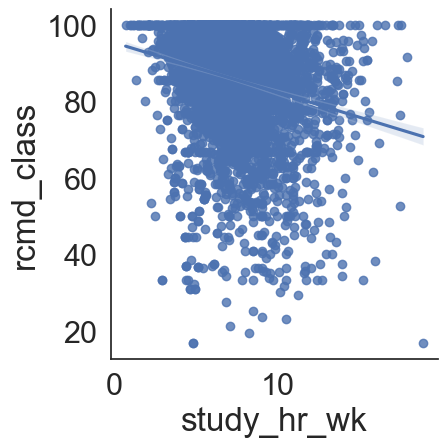

In [47]:
studyhour_vs_rcmdrates = sns.lmplot(
    data=cleaned_df_stem,
    x='study_hr_wk',
    y='rcmd_class',
)

The regression line reveals a negative correlation, suggesting that courses requiring more study hours tend to have lower recommendation rates. However, to confirm this relationship statistically, we apply Ordinary Least Squares (OLS) regression:

In [48]:
# Define the regression model
outcome, predictors = patsy.dmatrices('rcmd_class ~ study_hr_wk', data=cleaned_df_stem)
model = sm.OLS(outcome, predictors)
results = model.fit()

# Display the result
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             rcmd_class   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     252.5
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.84e-55
Time:                        16:49:50   Log-Likelihood:                -19454.
No. Observations:                4853   AIC:                         3.891e+04
Df Residuals:                    4851   BIC:                         3.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.3832      0.635    150.109      

The OLS analysis confirms a weak but statistically significant negative correlation (R^2 = 0.049), indicating that weekly study hours explain only 4.9% of the variation in recommendation rates. The regression coefficient suggests that for each additional study hour per week, the recommendation rate decreases by approximately 1.3%. While this finding implies that time-intensive courses tend to be less recommended, study hours alone are not a strong predictor. Other factors, such as course difficulty, teaching quality, and student interest, likely play a more significant role. Future analyses should incorporate additional predictors and explore non-linear relationships to gain deeper insights into the factors influencing course recommendations.

### Section 3 of EDA - courses where students’ actual grades meet or exceed their expectations have higher class recommendation rates.

In [44]:
# Create an Indicator Column
df_cleaned['grade_met_or_exceeded'] = np.where(
    df_cleaned['avg_grade_rec'] >= df_cleaned['avg_grade_exp'], 1, 0
)

group_means = df_cleaned.groupby('grade_met_or_exceeded')['rcmd_class'].mean()
print(group_means)


grade_met_or_exceeded
0    89.914092
1    87.272024
Name: rcmd_class, dtype: float64


In [45]:
group0 = df_cleaned[df_cleaned['grade_met_or_exceeded'] == 0]['rcmd_class'].dropna()
group1 = df_cleaned[df_cleaned['grade_met_or_exceeded'] == 1]['rcmd_class'].dropna()

t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print("T-statistic:", t_stat)
print("p-value:", p_value)


T-statistic: 9.678603663337725
p-value: 5.39208837041521e-22


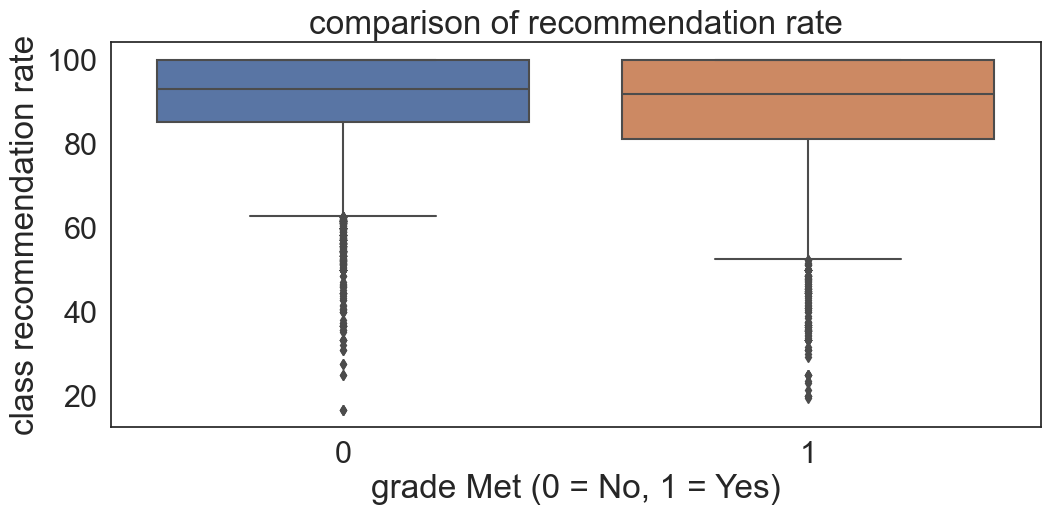

In [46]:
sns.boxplot(
    x='grade_met_or_exceeded', 
    y='rcmd_class', 
    data=df_cleaned
)
plt.xlabel('grade Met (0 = No, 1 = Yes)')
plt.ylabel('class recommendation rate')
plt.title('comparison of recommendation rate')
plt.show()


# Ethics & Privacy

In our data science project, ethical considerations and privacy protction are integrated into every phase of our process—from the initial formulation of unbiased and inclusive research questions to the transparent communication of our findings. We ensure that our data collection practices adhere to ethical standards by verifying privacy policies and confirming that the datasets do not favor or exclude specific populations. During analysis, we actively apply statistical tests and fairness metrics to detect any biases, and we are prepared to mitigate these through methods such as re-sampling or incorporating additional data sources. We also take stringent measures to protect sensitive information by anonymizing or aggregating data, ensuring full compliance with legal and usage terms. Utilizing established guidelines like UCSD’s Ethics Checklist provsion, our team maintains ongoing oversight and open communication to promptly address emerging ethical issues, ultimately striving to produce research that is both equitable and transparent.

# Team Expectations 

* Show up to meetings on time and participate disccison actively.
* Communicate and collabrate with manner to make sure a productive and efficient working environment.
* Work as hard as possible to ensure every assignment is due before deadline.
* Split work equally and fairly.
* Openly give and reveive feedback from groupmates for the improvements.
* Be nice &#x1F604;

# Project Timeline Proposal

| Meeting Date | Meeting Time | Completed Before Meeting                                                                                         | Discuss at Meeting                                                                                                                                                   |
|-------------:|:-----------:|:------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1/22**     | 5 PM        | 1. Read & review COGS 108 expectations <br> 2. Brainstorm topics/questions on course evaluations                                                     | 1. Finalize communication method <br> 2. Decide on final project focus (CAPE & Enrollment) <br> 3. Draft initial hypothesis <br> 4. Begin background research on CAPE data |
| **2/1**      | 5 PM        | 1. Conduct background research on course evaluation studies <br> 2. Look at how other universities analyze eval data                                   | 1. Narrow down research question <br> 2. Discuss ethical/data privacy considerations <br> 3. Outline ideal dataset requirements |
| **2/8**      | 5 PM        | 1. Draft project proposal & integrate feedback <br> 2. Search for CAPE & Enrollment datasets (format, coverage)                                        | 1. Review/finalize project proposal <br> 2. Plan data-wrangling strategy (merging CAPE & enrollment) <br> 3. Assign roles for data collection, cleaning, and analysis         |
| **2/22**     | 5 PM        | 1. Import & wrangle combined CAPE + Enrollment data <br> 2. Perform basic EDA (missing data, summary stats)                                            | 1. Review initial wrangling/EDA findings <br> 2. Draft advanced analysis plan (correlation, regression) <br> 3. Confirm approach for missing evals or outliers                |
| **3/4**      | 5 PM        | 1. Finalize data cleaning & EDA <br> 2. Begin preliminary analysis (e.g., correlation between eval scores & grades)                                    | 1. Discuss results & refine analysis methods (control for course level/instructor) <br> 2. Complete project check-in or milestone report                                   |
| **3/15**     | 5 PM        | 1. Wrap up statistical analysis (regressions, hypothesis tests) <br> 2. Draft discussion/conclusions                                                   | 1. Review/edit full analysis & results <br> 2. Plan final data visualization (e.g., CAPE vs. grades, trends over time) <br> 3. Assign final write-up tasks                       |
| **3/19**     | Before 11:59 PM | *No new tasks before meeting; final submission deadline*                                                                                         | 1. Finalize project report <br> 2. Submit final project and group surveys <br> 3. Ensure code/data/documentation are well-organized                                  |